In [1]:
##Cómo crear nubes de palabras a partir de un texto utilizando técnicas de PLN##

In [2]:
#Como crear nubes de palabras a partir de un texto utilizando tecnicas de PLN
   #1. Carga de librerias
   #2. Generación de una nueva carpeta en el directorio de trabajo
   #3. Carga de datos
   #4. Preprocesamiento de datos 
       #a) Limpieza de datos
       #b) Tokenizacion
       #c) Eliminación de stop words
       #d) Vectorizacion
   #5. Creacion de la nube de palabras

In [3]:
#1. Carga de librerias

In [4]:
#Importamos las librerias necesarias para realizar este analisis y visualizacion
import os
import re
import pandas as pd
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [5]:
#2. Generacion de una nueva carpeta en el directorio de trabajo

In [6]:
#En el directorio de trabajo debemos tener:
    #a)una carpeta denominada 'post', que contendra todos los textos con los cuales vamos a trabajar en formato txt. 
    #b)el archivo stop_words_spanish.txt que contiene en listado de 'stop words'
    #c)una carpeta llamada imagenes, donde guardaremos las imagenes de las nubes de palabras en formato PNG que generaremos.

#Generamos la carpeta 'imagenes'.
nueva_carpeta = 'imagenes/'

try:
    os.mkdir(nueva_carpeta)
except OSError: 
    print('Ya existe una carpeta llamada %s' % nueva_carpeta)
else: 
    print('Se ha creado la carpeta: %s' % nueva_carpeta)

Se ha creado la carpeta: imagenes/


In [7]:
#3. Carga de datos 

In [8]:
#Generamos una lista donde incluiremos todos los archivos que debe leer, 
#indicandole la carpeta donde se encuentran, en este caso la carpeta 'post'. 
filePath =[]
for file in os.listdir("./post/"):
    filePath.append(os.path.join("./post", file))

In [9]:
##Generamos un dataframe en el cual incluiremos una fila por cada texto.
post_df = pd.DataFrame()
for file in filePath:
    with open (file, "rb") as readFile:
        post_df = pd.DataFrame([readFile.read().decode('utf8')]).append(post_df)


#Establecemos el índice para el dataframe
post_df.index = ['1', '2', '3', '4', '5', '6']
#Nombramos la columna de los valores en el dataframe
post_df.columns =['texto']

#Mostramos en pantalla el dataframe
post_df

,texto
1,En los últimos meses se han producido una seri...
2,La inteligencia artificial está cada vez más p...
3,"A lo largo de la historia, los datos geoespaci..."
4,"Nos encontramos es un momento histórico, donde..."
5,La profesión del científico de datos está en a...
6,La vida ocurre en tiempo real y buena parte de...


In [10]:
#4. Preprocesamiento de datos 

In [11]:
#a) Limpieza de datos:  
#Pasar todo el texto a minusculas. 
#Eliminacion de los signos de puntuacion.
#Eliminacion de los saltos de carro y tabulaciones. 

In [12]:
#Pasamos todo el texto a minusculas y eliminamos los signos de puntuacion y
#los saltos de carro
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub('\[.*?¿\]\%', ' ', texto)
    texto = re.sub('[%s]' % re.escape(string.punctuation), ' ', texto)
    texto = re.sub('\w*\d\w*', '', texto)
    return texto

In [13]:
#Aplicamos la función 'limpiar_texto' al dataframe
limpieza= lambda x: limpiar_texto(x)
post_clean = pd.DataFrame(post_df.texto.apply(limpieza))
post_clean

,texto
1,en los últimos meses se han producido una seri...
2,la inteligencia artificial está cada vez más p...
3,a lo largo de la historia los datos geoespaci...
4,nos encontramos es un momento histórico donde...
5,la profesión del científico de datos está en a...
6,la vida ocurre en tiempo real y buena parte de...


In [14]:
#b) Tokenización

In [15]:
#Para realizar la tokenizacion usaremos el comando split() 
#que separa la cadena de caracteres en unidades mas pequeñas, en este caso palabras. 
#Se crea una nueva columna en la tabla con los tokens denominada 'texto_tokenizado''. 
def tokenizar (text):
    text = text.split (sep = ' ')
    return(text)

post_clean['texto_tokenizado'] = post_clean['texto'].apply(lambda x:tokenizar(x))
post_clean

,texto,texto_tokenizado
1,en los últimos meses se han producido una seri...,"[en, los, últimos, meses, se, han, producido, ..."
2,la inteligencia artificial está cada vez más p...,"[la, inteligencia, artificial, está, cada, vez..."
3,a lo largo de la historia los datos geoespaci...,"[a, lo, largo, de, la, historia, , los, datos,..."
4,nos encontramos es un momento histórico donde...,"[nos, encontramos, es, un, momento, histórico,..."
5,la profesión del científico de datos está en a...,"[la, profesión, del, científico, de, datos, es..."
6,la vida ocurre en tiempo real y buena parte de...,"[la, vida, ocurre, en, tiempo, real, y, buena,..."


In [16]:
#c) Eliminacion de stop words

In [17]:
#Generamos una nueva tabla donde cada fila es un token
post_clean = post_clean.explode(column = 'texto_tokenizado')
post_clean

,texto,texto_tokenizado
1,en los últimos meses se han producido una seri...,en
1,en los últimos meses se han producido una seri...,los
1,en los últimos meses se han producido una seri...,últimos
1,en los últimos meses se han producido una seri...,meses
1,en los últimos meses se han producido una seri...,se
...,...,...
6,la vida ocurre en tiempo real y buena parte de...,antes
6,la vida ocurre en tiempo real y buena parte de...,de
6,la vida ocurre en tiempo real y buena parte de...,poder
6,la vida ocurre en tiempo real y buena parte de...,consumirlos


In [18]:
#Eliminamos las stop words. 
#Para ello utilizaremos un archivo 'stop_words_spanish.txt', que presenta un listado con las stop words en español.
#El archivo lo colocamos en el mismo directorio en el cual estamos trabajando

#Leemos el archivo
with open('stop_words_spanish.txt', encoding = 'UTF8') as f:
    stop_words = f.read().splitlines()

In [19]:
#Añadimos nuevas Stop words que no aportan información relevante a nuestros
#textos o aparecen recurrentemente debido al contexto de los textos

stop_words.extend(('caso', 'forma', 'unido', 'abiertos', 'caso', 'post',
                    'espera', 'datos', 'dato', 'servicio', 'nun', 'día',
                      'nen', 'data', 'conjuntos', 'importantes', 'unido',
                      'unión', 'nla', 'r', 'n', 'data', 'objetivo', 'resúmenes'))


In [20]:
#Eliminamos las Stop words de nuestro dataframe
post_clean = post_clean[~(post_clean['texto_tokenizado'].isin(stop_words))]
post_clean

,texto,texto_tokenizado
1,en los últimos meses se han producido una seri...,meses
1,en los últimos meses se han producido una seri...,producido
1,en los últimos meses se han producido una seri...,serie
1,en los últimos meses se han producido una seri...,anuncios
1,en los últimos meses se han producido una seri...,relacionados
...,...,...
6,la vida ocurre en tiempo real y buena parte de...,minimizar
6,la vida ocurre en tiempo real y buena parte de...,número
6,la vida ocurre en tiempo real y buena parte de...,operaciones
6,la vida ocurre en tiempo real y buena parte de...,consumirlos


In [21]:
#Unimos los tokens en una unica fila por cada texto
post_clean = pd.DataFrame(post_clean.groupby(level = 0)['texto_tokenizado'].apply(' '.join))

post_clean

,texto_tokenizado
1,meses producido serie anuncios relacionados co...
2,inteligencia artificial presente vidas prese...
3,historia geoespaciales permitido humanidad en...
4,encontramos histórico convertido activo clave...
5,profesión científico auge informe empleos eme...
6,vida ocurre tiempo real vida discurre mundo ...


In [22]:
#d) Vectorizacion

In [23]:
#Construimos una matriz de frecuencia de palabras. 
#Las columnas son cada uno de los post y las filas cada uno de los tokens.  
#Utilizaremos la función CountVectorizer()
vectorizador = CountVectorizer()
post_vec = vectorizador.fit_transform(post_clean.texto_tokenizado)


In [24]:
#Convierte la matriz de frecuencia de palabras en el texto en una
#forma vectorial regularizada
transformer = TfidfTransformer()
post_trans = transformer.fit_transform(post_vec).toarray()
print(vectorizador.get_feature_names())
print(post_trans)

['abarcan', 'abierta', 'abiertas', 'abiertos', 'aborda', 'abordan', 'abra', 'abrir', 'abrirlo', 'absoluta', 'accede', 'acceder', 'accesibles', 'acceso', 'acelerado', 'acelerar', 'acerca', 'acertada', 'aclarar', 'acompañada', 'acostumbramos', 'act', 'actividades', 'activo', 'activos', 'acto', 'actual', 'actualidad', 'actualización', 'actúen', 'acudimos', 'acumula', 'adaptado', 'adecuada', 'adecuadas', 'adecuado', 'adicionales', 'adición', 'administraciones', 'administración', 'adquirida', 'adquirir', 'afirman', 'afortunadamente', 'agenda', 'agregación', 'agregada', 'albergan', 'alcanzar', 'aleatorización', 'alertas', 'algoritmo', 'algoritmos', 'alguien', 'alineación', 'alineados', 'alineamiento', 'allá', 'almacenamiento', 'almacenamientos', 'alta', 'alteración', 'alterar', 'alternativas', 'altruistas', 'amazon', 'ambas', 'ambición', 'ambiente', 'americana', 'amparo', 'ampliar', 'amplifica', 'amplificado', 'amplio', 'analizados', 'analizar', 'analítica', 'andalucía', 'animamos', 'animas'

In [25]:
#5. Creacion de la nube de palabras

In [28]:
#Generamos el dataframe a partir de la matriz del conteo de palabras
post = pd.DataFrame(post_vec.toarray(), columns=vectorizador.get_feature_names())

#Transponemos la matriz, para que cada columna represente un post y y cada fila un token. 
post = post.transpose()

#Mostramos en pantalla las primeras filas del dataframe
post.head()

,0,1,2,3,4,5
abarcan,0,0,0,0,1,0
abierta,0,0,0,0,1,0
abiertas,0,0,0,0,1,0
abiertos,1,0,0,0,0,0
aborda,0,0,0,1,0,0


In [29]:
#Indicamos las caracteristicas que presentara la nube de palabras
wc = WordCloud(stopwords=stop_words, background_color="black", colormap="hsv",
               max_font_size=150, random_state=123)

In [30]:
plt.rcParams['figure.figsize'] = [40,30]

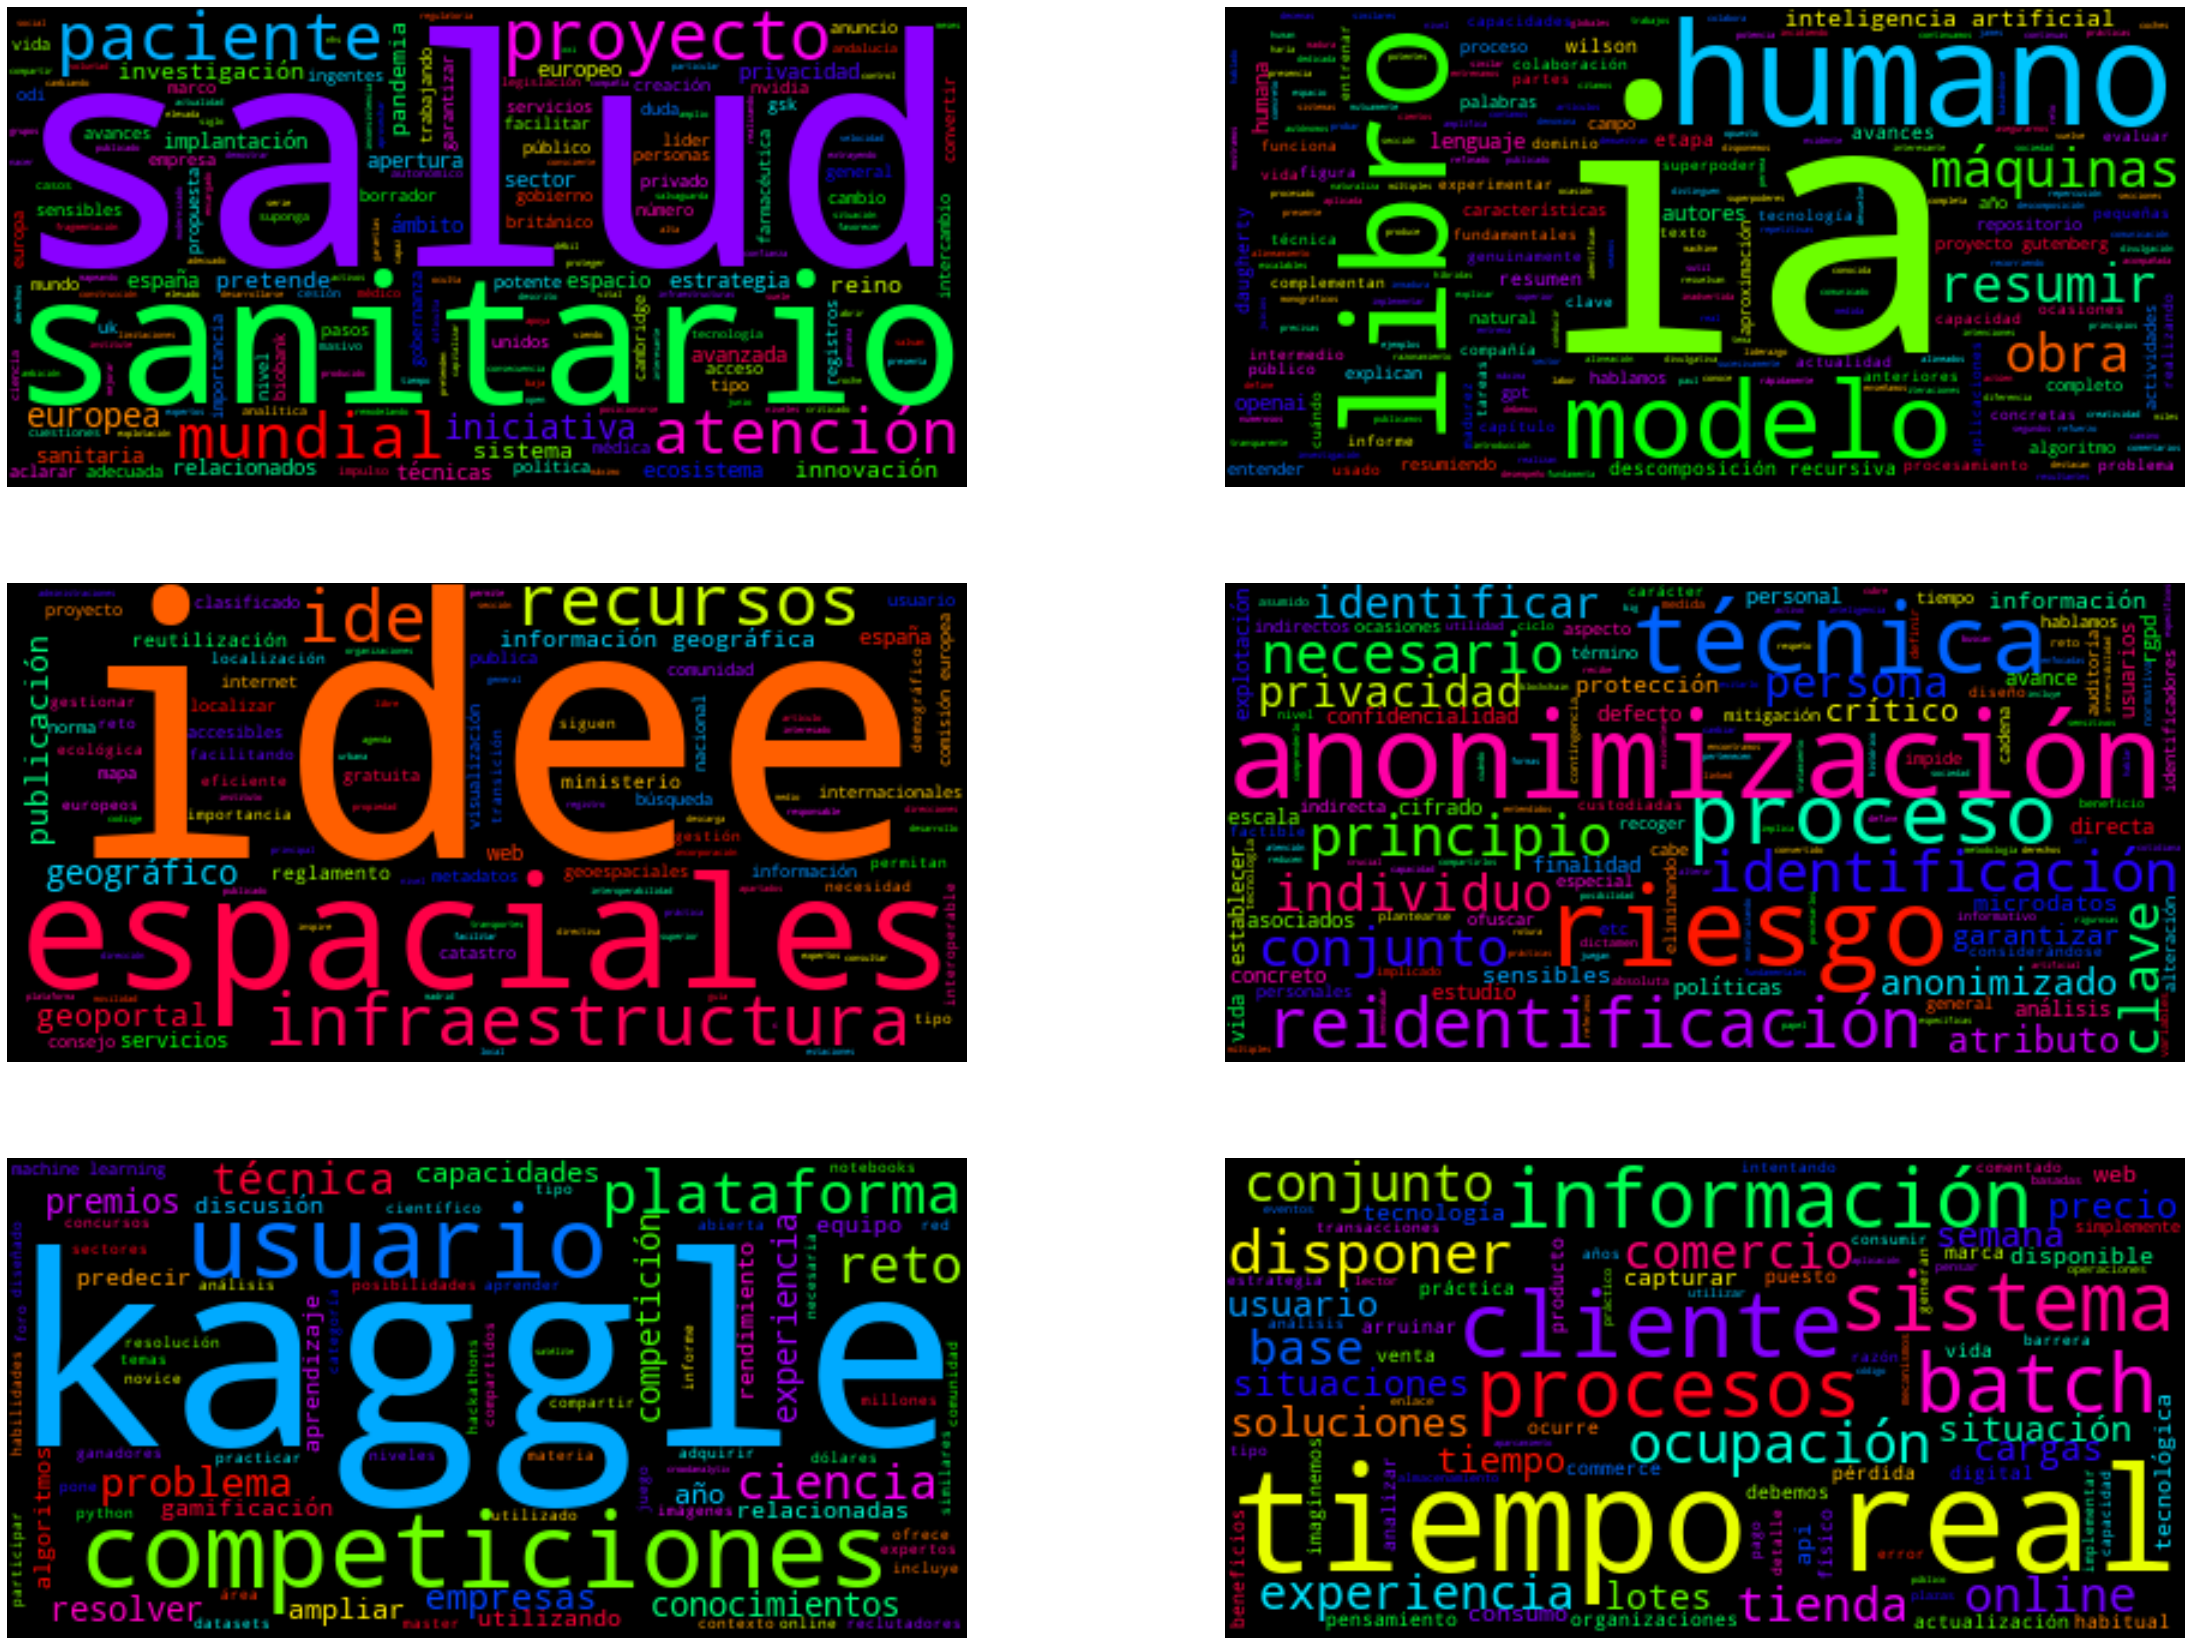

In [31]:
#Generamos las nubes de palabras para cada uno de los posts
for index, i in enumerate(post.columns):
    wc.generate(post_clean.texto_tokenizado[i])
    plt.subplot(3, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('imagenes/.png')
plt.show()